In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv("./titanic/train.csv")

In [3]:
titanic_df.head()
#passenger ID: 탑싀객 일련번호
#Survived: 생존여부(label) : 0: 사망, 1:생존
# Pclass: 선실 등급
# SibSp:  동승한 형제자매 혹은 배우자 인원수
#Parch:  동승한 부모님 또는 자녀수
# Ticket: 티켓 번호
#Embaked: 중간 정착 항구: C: Cherbourg, Q= Queenstown, S=Southhampton

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
#일단 한 번 해보기
# target(label): Survived
# feature: 나머지 컬럼

In [6]:
X_titanic_df = titanic_df.drop('Survived', axis=1)
y_titanic_df = titanic_df.Survived

In [7]:
#0) 전처리

In [8]:
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


passengerID,name,ticket,cabin이 생존여부와 관계없다고 판단, 사용하지 않는다.

In [9]:
# null값 처리, string 처리필요

In [10]:
#문자열 피처를 삭제(문자열이 있으면 학습할 수 없음)
X_titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [11]:
# 2) 문자열 피처 인코딩(숫자값으로 변환)

# 성별 피처를 LabelEncoding하여 숫자로 변환
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_titanic_df.Sex = le.fit_transform(X_titanic_df.Sex)
X_titanic_df.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [12]:
# 라벨 인코딩 내용(클래스) 확인
le.classes_

array(['female', 'male'], dtype=object)

In [13]:
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 45.4+ KB


In [14]:
# Embarked 피처를 onehot Encoding하여 숫자로 변환(get_dummies())
# Embarked에는 Null값이 2개 있음 - 처리요망

X_titanic_df = pd.get_dummies(X_titanic_df)
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,0,1
887,1,0,19.0,0,0,30.0000,0,0,1
888,3,0,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [15]:
X_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int32  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 41.0 KB


In [16]:
#3) NaN 결측치 채워넣기 (Age 항목 714개)

X_titanic_df.Age.fillna(X_titanic_df.Age.mean(), inplace=True)

In [17]:
X_titanic_df.info() #Age 값의 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int32  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 41.0 KB


In [18]:
import numpy as np
# Age columms을 Age_group컬럼으로 변환
# 0 ~ 5: Baby, 6~12: Child, 13~18: Teenager, 19~25: Student, 26~35: Young Adult, 36~60: Adult, 61~: elderly
X_titanic_df['Age_group'] = np.digitize(X_titanic_df.Age, [0, 6, 13, 19, 26, 36, 61])
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Age_group
0,3,1,22.000000,1,0,7.2500,0,0,1,4
1,1,0,38.000000,1,0,71.2833,1,0,0,6
2,3,0,26.000000,0,0,7.9250,0,0,1,5
3,1,0,35.000000,1,0,53.1000,0,0,1,5
4,3,1,35.000000,0,0,8.0500,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0,0,1,5
887,1,0,19.000000,0,0,30.0000,0,0,1,4
888,3,0,29.699118,1,2,23.4500,0,0,1,5
889,1,1,26.000000,0,0,30.0000,1,0,0,5


In [19]:
X_titanic_df.Age_group.value_counts()

5    373
6    195
4    162
3     70
1     44
2     25
7     22
Name: Age_group, dtype: int64

In [20]:
X_titanic_df.drop('Age', axis=1, inplace=True)
X_titanic_df

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Age_group
0,3,1,1,0,7.2500,0,0,1,4
1,1,0,1,0,71.2833,1,0,0,6
2,3,0,0,0,7.9250,0,0,1,5
3,1,0,1,0,53.1000,0,0,1,5
4,3,1,0,0,8.0500,0,0,1,5
...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,13.0000,0,0,1,5
887,1,0,0,0,30.0000,0,0,1,4
888,3,0,1,2,23.4500,0,0,1,5
889,1,1,0,0,30.0000,1,0,0,5


In [21]:
X_titanic_df.Age_group.value_counts()

5    373
6    195
4    162
3     70
1     44
2     25
7     22
Name: Age_group, dtype: int64

In [22]:
X_titanic_df.Age_group.value_counts().sort_index()

1     44
2     25
3     70
4    162
5    373
6    195
7     22
Name: Age_group, dtype: int64

In [23]:
# 1) 학습용, 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, random_state=213)

In [24]:
y_train

234    0
761    0
805    0
144    0
765    1
      ..
811    0
1      1
864    0
228    0
299    1
Name: Survived, Length: 668, dtype: int64

In [32]:
#2) 결정트리 객체 생성
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()

In [33]:
#3) 학습
dc.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
#4) 평가
print(f'train score = {dc.score(X_train, y_train)}')
print(f'test score = {dc.score(X_test, y_test)}')

train score = 0.9520958083832335
test score = 0.8340807174887892


In [ ]:
# 평가 점수가 낮아 전처리를 세분화해보기로 함


In [40]:
from sklearn.model_selection import GridSearchCV
#결정트리 최적화 - 하이퍼파라미터 튜닝 & 교차검증 -: GridSearchCV()
dt_params = {
    'max_depth' : [3, 5, 7],
    'min_samples_split' : [5, 10, 15],
    'splitter' : ['best']
}
grid_dt = GridSearchCV(dc, param_grid=dt_params, cv=5) 
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [5, 10, 15],
                         'splitter': ['best']})

In [41]:
grid_dt.best_params_

{'max_depth': 7, 'min_samples_split': 10, 'splitter': 'best'}

In [42]:
grid_dt.score(X_train, y_train)

0.8622754491017964

In [43]:
grid_dt.score(X_test, y_test)

0.7937219730941704

In [47]:
#다른 분류 알고리듬으로 예측하기
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='lbfgs', max_iter=500)
lr_clf.fit(X_train, y_train)
print(f'train socre : {lr_clf.score(X_train, y_train)}')
print(f'test socre : {lr_clf.score(X_test, y_test)}')

print('*' * 50)

svm_clf = SVC(gamma='scale')
svm_clf.fit(X_train, y_train)
print(f'train socre : {svm_clf.score(X_train, y_train)}')
print(f'test socre : {svm_clf.score(X_test, y_test)}')

train socre : 0.8218562874251497
test socre : 0.7847533632286996
**************************************************
train socre : 0.6916167664670658
test socre : 0.6367713004484304


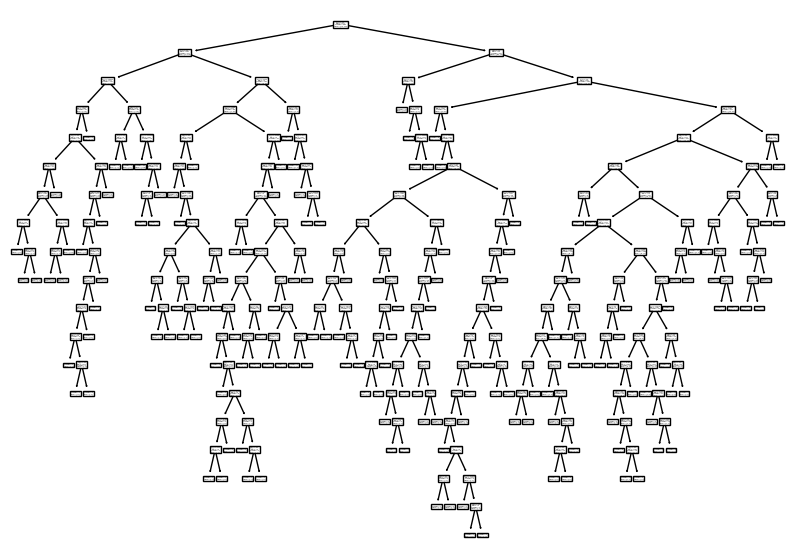

In [51]:
# 결정 트리 시각화

import graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
plot_tree(dc)
plt.show()

In [55]:
from sklearn.tree import export_graphviz

label_names = ['unsurvived', 'survived'] # 0번인 사람을 언서바이브드, 1번인 ~
dot_data = export_graphviz(dc, class_names=label_names, feature_names=X_titanic_df.columns, filled=True, impurity=True)
graphviz.Source(dot_data)

data = graphviz.Source(dot_data, format('png'))
data.render('titanic_graphviz')

'titanic_graphviz.png.pdf'

In [56]:
# 중요한 특성 파악
dc.best_estimator_.feature_importances_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_estimator_'

In [57]:
# 중요한 특성 파악
grid_dt.best_estimator_.feature_importances_

array([0.16472291, 0.52767396, 0.04890782, 0.01178506, 0.16640486,
       0.00218555, 0.        , 0.        , 0.07831984])

In [63]:
# 특성 중요도를 시리즈로 변환
print(pd.Series(data=grid_dt.best_estimator_.feature_importances_, index=X_titanic_df.columns))
# 특성 중요도를 데이터프레임으로 전환
imp_df = pd.DataFrame({'features' : X_titanic_df.columns, \
    'importance' : grid_dt.best_estimator_.feature_importances_})

Pclass        0.164723
Sex           0.527674
SibSp         0.048908
Parch         0.011785
Fare          0.166405
Embarked_C    0.002186
Embarked_Q    0.000000
Embarked_S    0.000000
Age_group     0.078320
dtype: float64


In [64]:
imp_df.sort_values(by='importance', ascending=False)

,features,importance
1,Sex,0.527674
4,Fare,0.166405
0,Pclass,0.164723
8,Age_group,0.078320
2,SibSp,0.048908
3,Parch,0.011785
5,Embarked_C,0.002186
6,Embarked_Q,0.000000
7,Embarked_S,0.000000


<AxesSubplot: ylabel='features'>

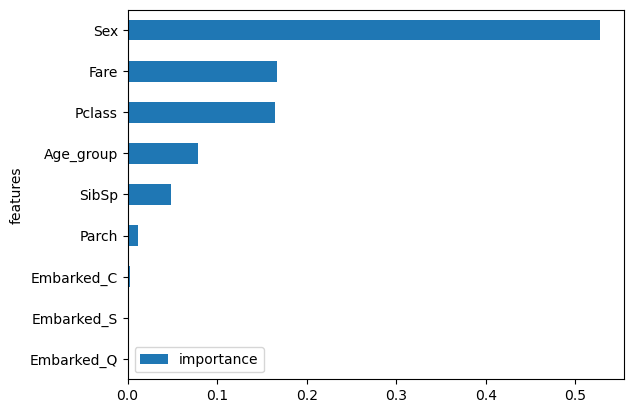

In [67]:
# 결정트리 시각화
imp_df.sort_values(by='importance').set_index('features').plot(kind='barh')